In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('Student_Marks.csv')
df[:10]

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [3]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [4]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


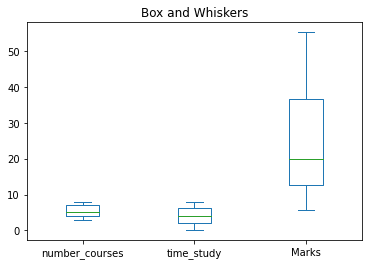

In [5]:
df.plot.box()
plt.title('Box and Whiskers')
plt.show()

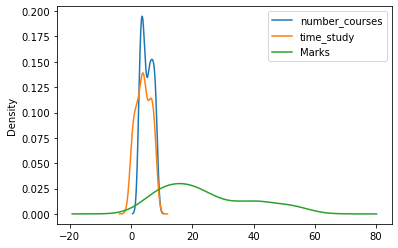

In [6]:
df.plot.density()
plt.show()

In [7]:
X_train = np.c_[df[['number_courses', 'time_study']][:75]]
X_test = np.c_[df[['number_courses', 'time_study']][75:]]
y_train = df['Marks'][:75]
y_test = df['Marks'][75:]

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 2), (75,), (25, 2), (25,))

In [9]:
print('Peak to Peak Obervation On Train: ', np.ptp(X_train, axis=0))
print('Peak to Peak Obervation On Target: ', np.ptp(y_train, axis=0))

Peak to Peak Obervation On Train:  [5.    7.813]
Peak to Peak Obervation On Target:  49.114


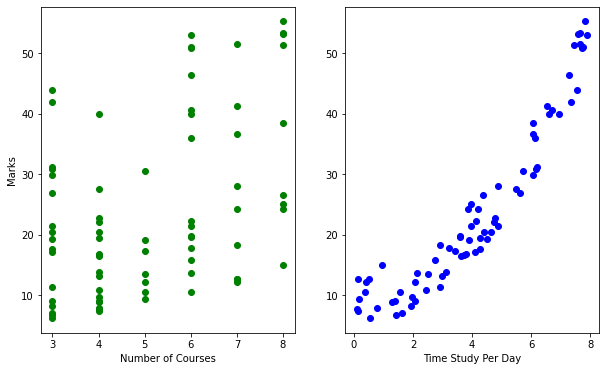

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,6))

ax[0].scatter(X_train[:,0], y_train, color='g')
ax[0].set_xlabel('Number of Courses')
ax[0].set_ylabel('Marks')

ax[1].scatter(X_train[:,1], y_train, color='b')
ax[1].set_xlabel('Time Study Per Day')
plt.show()

# Mean Squared Error or Cost Function


In [11]:
def compute_cost(X, y, w, b):
    m,n = X.shape
    total_cost = 0
    cost = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
    total_cost = (1/(2*m)) * cost
    
    return total_cost

In [12]:
w_init = np.zeros(X_train.shape[1])
b_init = 0

print('Cost at Initial Zeros: ', compute_cost(X_train, y_train, w_init, b_init))

Cost at Initial Zeros:  384.67291692666686


# Gradients - Derivative of Cost Function


In [13]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        error = f_wb - y[i]
        dj_db += error
        for j in range(n):
            dj_dw[j] += error * X[i,j]
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_db, dj_dw

In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    m,n = X.shape
    
    w = w_in
    b = b_in
    J_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000:
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
            
    return w, b, J_history

In [15]:
initial_w = np.zeros((X_train.shape[1],))
initial_b = 0
num_iters = 10000
alpha = 0.01

print('Mean Squared Error Over 2 times of all training exmaples')
w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, num_iters, compute_cost, compute_gradient)

Mean Squared Error Over 2 times of all training exmaples
Iteration    0: Cost   123.70   
Iteration 1000: Cost     6.86   
Iteration 2000: Cost     6.29   
Iteration 3000: Cost     6.19   
Iteration 4000: Cost     6.17   
Iteration 5000: Cost     6.17   
Iteration 6000: Cost     6.17   
Iteration 7000: Cost     6.17   
Iteration 8000: Cost     6.17   
Iteration 9000: Cost     6.17   


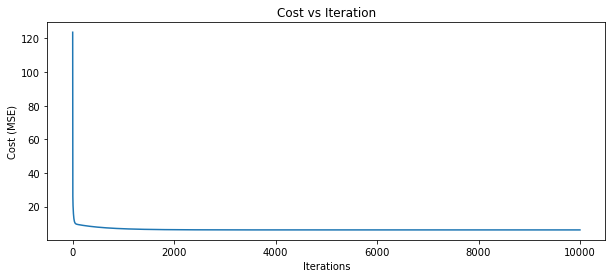

In [16]:
plt.figure(figsize=(10,4))
plt.plot(range(num_iters), J_history)
plt.title('Cost vs Iteration')

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()

# Prediction on Train set by Optimized parameters w and b


In [17]:
y_pred = np.zeros(y_train.shape)

for i in range(len(y_train)):
    y_pred[i] = np.dot(X_train[i], w) + b

In [18]:
print(r2_score(y_train,y_pred) * 100)

93.81839773637823


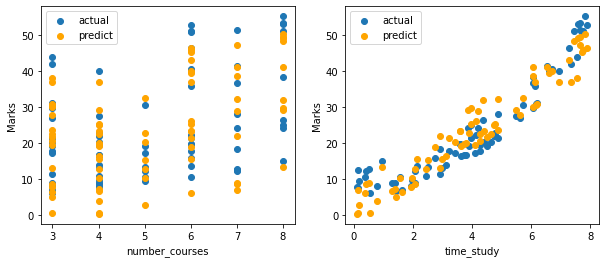

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='actual')
    ax[i].scatter(X_train[:,i], y_pred, color='orange', label='predict')
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel('Marks')
    ax[i].legend()
    
plt.show()

In [20]:
print(f'Mean Squared Error over 2 times All training examples: {compute_cost(X_train, y_train, w, b):e}')
print('Mean Aboslute Error: ', mean_absolute_error(y_train, y_pred))
print(f'R2 Score on Train Set: {r2_score(y_train, y_pred)*100:}')

Mean Squared Error over 2 times All training examples: 6.169440e+00
Mean Aboslute Error:  3.019298789522319
R2 Score on Train Set: 93.81839773637823


# Polynomial Regression on Train set


In [21]:
X_train = np.c_[X_train, X_train[:,1]**2]

In [22]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_norm = (X_train - mu) / sigma

In [23]:
np.ptp(X_norm,axis=0)


array([2.93848889, 3.36231321, 3.19483771])

In [24]:
X_norm.shape


(75, 3)

In [25]:
initial_w = np.zeros((X_norm.shape[1],))
initial_b = 0
num_iters = 10000
alpha = 0.01

print('Mean Squared Error over 2 time All training examples:')
w, b, J_history = gradient_descent(X_norm, y_train, initial_w, initial_b, alpha, num_iters, compute_cost, compute_gradient)
print('Previous Cost: 6')

Mean Squared Error over 2 time All training examples:
Iteration    0: Cost   375.01   
Iteration 1000: Cost     0.82   
Iteration 2000: Cost     0.42   
Iteration 3000: Cost     0.22   
Iteration 4000: Cost     0.13   
Iteration 5000: Cost     0.08   
Iteration 6000: Cost     0.06   
Iteration 7000: Cost     0.04   
Iteration 8000: Cost     0.04   
Iteration 9000: Cost     0.04   
Previous Cost: 6


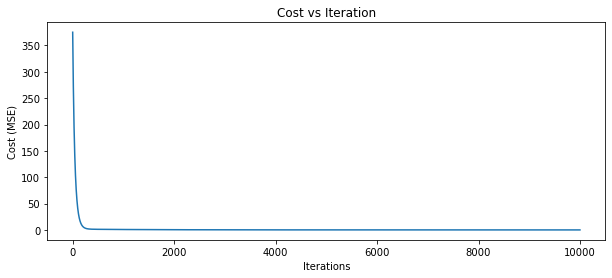

In [26]:
plt.figure(figsize=(10,4))
plt.plot(range(num_iters), J_history)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()

# Prediction on Standarized Train set


In [27]:
y_pred = np.zeros(y_train.shape)

for i in range(len(y_train)):
    y_pred[i] = np.dot(X_norm[i], w) + b

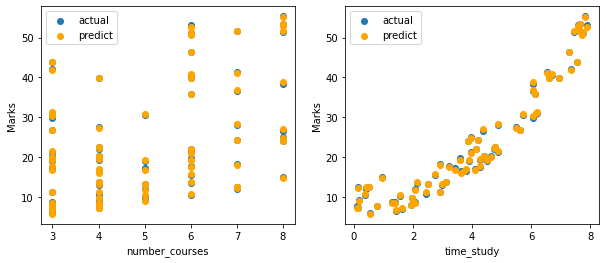

In [28]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='actual')
    ax[i].scatter(X_train[:,i], y_pred, color='orange', label='predict')
    ax[i].set_xlabel(df.columns[i])
    ax[i].set_ylabel('Marks')
    ax[i].legend()
    
plt.show()

In [29]:
print(f'Mean Squared Error over 2 times All training examples: {compute_cost(X_norm, y_train, w, b)}')
print('Mean Aboslute Error: ', mean_absolute_error(y_train, y_pred))
print(f'R2 Score on Normalized Train Set: {r2_score(y_train, y_pred)*100:}')

Mean Squared Error over 2 times All training examples: 0.0343763396436641
Mean Aboslute Error:  0.2236615151562118
R2 Score on Normalized Train Set: 99.96555588962327
